In [ ]:
import os
import numpy as np


Visualize

In [ ]:
import os
import matplotlib.pyplot as plt
from matplotlib.image import imread

# Define the directory containing test images
test_dir = "/content/drive/MyDrive/Colab Notebooks/Paper/Skin_Disease/test"

# Get a list of all subdirectories (class folders) in the test directory
class_folders = os.listdir(test_dir)

# Define the number of rows and columns for the subplot grid
num_rows = 5  # You can adjust this as needed
num_columns = 7  # You can adjust this as needed
num_images = num_rows * num_columns

# Create a subplot grid to display the images
fig, axes = plt.subplots(num_rows, num_columns, figsize=(20, 15))

# Loop through each class folder and display the first image from each
for i, class_folder in enumerate(class_folders):
    if i >= num_images:
        break  # Stop if we have displayed the desired number of images
    # Get the list of image files in the current class folder
    class_path = os.path.join(test_dir, class_folder)
    image_files = os.listdir(class_path)

    # Choose the first image in the folder (you can modify this as needed)
    if image_files:
        image_path = os.path.join(class_path, image_files[0])
        image = imread(image_path)

        # Calculate the row and column for this image
        row = i // num_columns
        col = i % num_columns

        # Display the image in the corresponding subplot
        axes[row, col].imshow(image)
        axes[row, col].set_title(class_folder)
        axes[row, col].axis('off')

# Remove empty subplots if the number of images is less than num_rows * num_columns
for i in range(len(class_folders), num_rows * num_columns):
    row = i // num_columns
    col = i % num_columns
    fig.delaxes(axes[row, col])

# Adjust subplot layout and show the plot
plt.tight_layout()
plt.show()


Output hidden; open in https://colab.research.google.com to view.

In [23]:
import os

# Define the directories for train and test data
train_dir = "/content/drive/MyDrive/Colab Notebooks/Paper/Skin_Disease/Augmented_Train"
test_dir = "/content/drive/MyDrive/Colab Notebooks/Paper/Skin_Disease/test"

# Get a list of all subdirectories (class folders) in the train and test directories
train_class_folders = os.listdir(train_dir)
test_class_folders = os.listdir(test_dir)

# Create dictionaries to store the counts
train_counts = {}
test_counts = {}

# Count the number of samples for each class in the train directory
for class_folder in train_class_folders:
    class_path = os.path.join(train_dir, class_folder)
    if os.path.isdir(class_path):
        num_samples = len(os.listdir(class_path))
        train_counts[class_folder] = num_samples

# Count the number of samples for each class in the test directory
for class_folder in test_class_folders:
    class_path = os.path.join(test_dir, class_folder)
    if os.path.isdir(class_path):
        num_samples = len(os.listdir(class_path))
        test_counts[class_folder] = num_samples

# Print the counts for each class
print("Train Data:")
for class_folder, count in train_counts.items():
    print(f"{class_folder}: {count} samples")

print("\nTest Data:")
for class_folder, count in test_counts.items():
    print(f"{class_folder}: {count} samples")


Train Data:
nevus: 2980 samples
Mycosis Fungoides: 920 samples
Neurofibromatosis: 680 samples
Melanoma: 1000 samples
Leprosy Lepromatous: 2340 samples
Lichen Planus: 1050 samples
Lupus Erythematosus Chronicus Discoides: 920 samples
Papilomatosis Confluentes And Reticulate: 720 samples
Tinea Nigra: 940 samples
Tinea Corporis: 910 samples
Pediculosis Capitis: 650 samples
squamous cell carcinoma: 1570 samples
pigmented benign keratosis: 3820 samples
Porokeratosis Actinic: 1010 samples
Psoriasis: 1050 samples
Pityriasis Rosea: 1030 samples
seborrheic keratosis: 640 samples
vascular lesion: 1130 samples
Tungiasis: 1060 samples

Test Data:
Darier's Disease: 20 samples
actinic keratosis: 26 samples
Epidermolysis Bullosa Pruriginosa: 20 samples
Impetigo: 22 samples
Hailey-Hailey Disease: 29 samples
Larva Migrans: 28 samples
Leprosy Borderline: 29 samples
Herpes Simplex: 18 samples
Basal Cell Carcinoma: 84 samples
dermatofibroma: 23 samples
Leprosy Tuberculoid: 47 samples
Neurofibromatosis: 18 

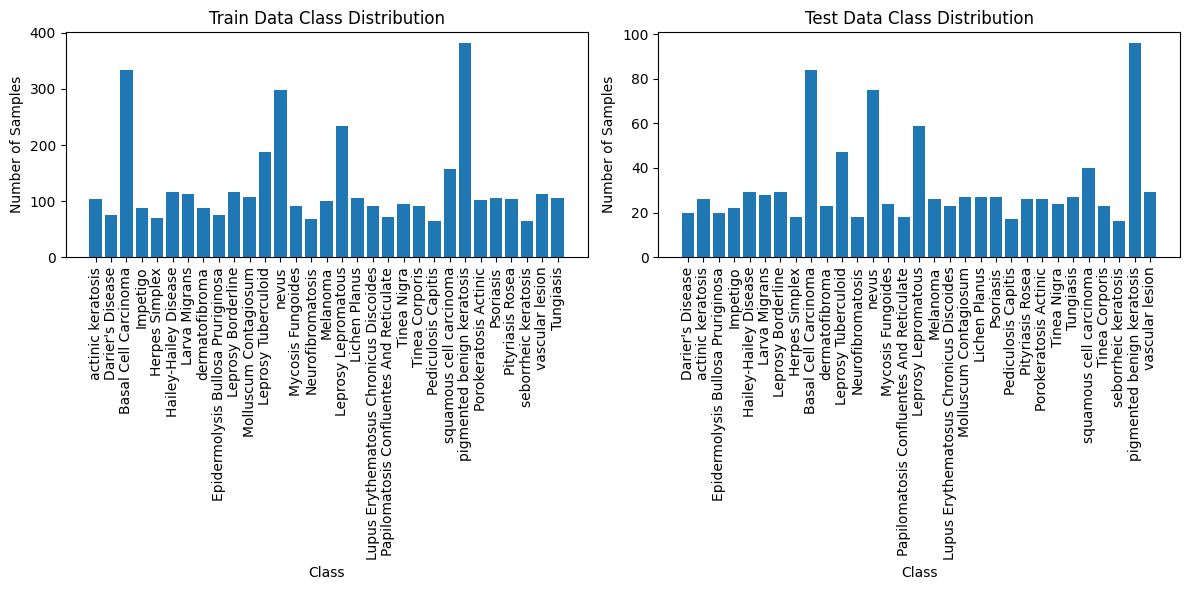

In [ ]:
import os
import matplotlib.pyplot as plt
# Get a list of all subdirectories (class folders) in the train and test directories
train_class_folders = os.listdir(train_dir)
test_class_folders = os.listdir(test_dir)

# Create lists to store the counts
train_counts = []
test_counts = []

# Count the number of samples for each class in the train directory
for class_folder in train_class_folders:
    class_path = os.path.join(train_dir, class_folder)
    if os.path.isdir(class_path):
        num_samples = len(os.listdir(class_path))
        train_counts.append(num_samples)

# Count the number of samples for each class in the test directory
for class_folder in test_class_folders:
    class_path = os.path.join(test_dir, class_folder)
    if os.path.isdir(class_path):
        num_samples = len(os.listdir(class_path))
        test_counts.append(num_samples)

# Create bar charts for the train and test data
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.bar(train_class_folders, train_counts)
plt.title("Train Data Class Distribution")
plt.xlabel("Class")
plt.ylabel("Number of Samples")
plt.xticks(rotation=90)

plt.subplot(1, 2, 2)
plt.bar(test_class_folders, test_counts)
plt.title("Test Data Class Distribution")
plt.xlabel("Class")
plt.ylabel("Number of Samples")

plt.xticks(rotation=90)
plt.tight_layout()
plt.show()


In [1]:
import os
import cv2
import numpy as np
import random

# Define the directories for train and test data
train_dir = "/content/drive/MyDrive/Colab Notebooks/Paper/Skin_Disease/train"
test_dir = "/content/drive/MyDrive/Colab Notebooks/Paper/Skin_Disease/test"

# Define the directory to save augmented images
augmented_train_dir = "/content/drive/MyDrive/Colab Notebooks/Paper/Skin_Disease/Augmented_Train"
augmented_test_dir = "/content/drive/MyDrive/Colab Notebooks/Paper/Skin_Disease/Augmented_Test"

# List of augmentation functions
def rotate(image, angle):
    return cv2.warpAffine(image, cv2.getRotationMatrix2D((image.shape[1] / 2, image.shape[0] / 2), angle, 1.0), (image.shape[1], image.shape[0]))

def horizontal_flip(image):
    return cv2.flip(image, 1)

def vertical_flip(image):
    return cv2.flip(image, 0)

def random_crop(image, scale_range=(0.8, 1.0)):
    scale = random.uniform(scale_range[0], scale_range[1])
    h, w, _ = image.shape
    new_h, new_w = int(h * scale), int(w * scale)
    x = random.randint(0, w - new_w)
    y = random.randint(0, h - new_h)
    cropped = image[y:y+new_h, x:x+new_w, :]
    return cv2.resize(cropped, (w, h))

def brightness_contrast(image, alpha_range=(0.9, 1.1), beta_range=(-5, 5)):
    alpha = random.uniform(alpha_range[0], alpha_range[1])
    beta = random.uniform(beta_range[0], beta_range[1])
    return cv2.convertScaleAbs(image, alpha=alpha, beta=beta)

def gaussian_noise(image, mean=0, sigma=5):
    noise = np.random.normal(mean, sigma, image.shape).astype(np.uint8)
    noisy_image = cv2.add(image, noise)
    return noisy_image

def shear(image, shear_range=(-5, 5)):
    shear_value = random.uniform(shear_range[0], shear_range[1])
    shear_matrix = np.array([[1, shear_value, 0], [0, 1, 0]])
    return cv2.warpAffine(image, shear_matrix, (image.shape[1], image.shape[0]))

def histogram_equalization(image):
    hsv = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)
    hsv[:,:,2] = cv2.equalizeHist(hsv[:,:,2])
    return cv2.cvtColor(hsv, cv2.COLOR_HSV2BGR)

def blur(image, kernel_size=(3, 3)):
    return cv2.GaussianBlur(image, kernel_size, 0)

def sharpen(image):
    kernel = np.array([[-1, -1, -1],
                       [-1,  9, -1],
                       [-1, -1, -1]])
    return cv2.filter2D(image, -1, kernel)

def localized_augmentation(image):
    # Apply a combination of the above augmentations in a localized manner
    image = brightness_contrast(image)
    image = rotate(image, random.uniform(-15, 15))
    image = shear(image)
    image = vertical_flip(image)
    image = horizontal_flip(image)
    return image


In [2]:
import os
import cv2
import numpy as np
import random

# Define the directory for the train data
train_dir = "/content/drive/MyDrive/Colab Notebooks/Paper/Skin_Disease/train"

# Define the directory to save augmented train images
augmented_train_dir = "/content/drive/MyDrive/Colab Notebooks/Paper/Skin_Disease/Augmented_Train"

# List of augmentation functions
augmentation_functions = [
    ("rotate", lambda image: rotate(image, angle=random.uniform(-15, 15))),
    ("horizontal_flip", horizontal_flip),
    ("vertical_flip", vertical_flip),
    ("random_crop", random_crop),
    ("brightness_contrast", brightness_contrast),
    ("gaussian_noise", gaussian_noise),
    ("shear", shear),
    ("histogram_equalization", histogram_equalization),
    ("blur", blur),
    ("sharpen", sharpen),
]

# Create a directory to save augmented train images
os.makedirs(augmented_train_dir, exist_ok=True)

# Process the train data
for class_folder in os.listdir(train_dir):
    class_path = os.path.join(train_dir, class_folder)
    augmented_class_path = os.path.join(augmented_train_dir, class_folder)
    os.makedirs(augmented_class_path, exist_ok=True)

    # Iterate through images in the class folder
    for filename in os.listdir(class_path):
        image_path = os.path.join(class_path, filename)
        image = cv2.imread(image_path)

        # Create a subfolder for each augmentation
        augmentation_subfolder = os.path.splitext(filename)[0]
        augmentation_subfolder_path = os.path.join(augmented_class_path, augmentation_subfolder)
        os.makedirs(augmentation_subfolder_path, exist_ok=True)

        # Apply each augmentation individually and save it with class name
        for augmentation_name, augmentation_function in augmentation_functions:
            augmented_image = augmentation_function(image)
            augmented_image_filename = f"{augmentation_name}_{filename}"
            augmented_image_path = os.path.join(augmentation_subfolder_path, augmented_image_filename)
            cv2.imwrite(augmented_image_path, augmented_image)

print("Data augmentation for the train dataset complete.")


Data augmentation for the train dataset complete.


In [27]:
import os

def count_samples_in_directory(directory):
    """
    Count the number of samples for each class in the given directory.

    Args:
    directory (str): The directory containing class subfolders.

    Returns:
    dict: A dictionary where keys are class names and values are the number of samples.
    """
    class_folders = os.listdir(directory)
    counts = {}

    for class_folder in class_folders:
        class_path = os.path.join(directory, class_folder)
        if os.path.isdir(class_path):
            num_samples = len(os.listdir(class_path))
            counts[class_folder] = num_samples

    return counts

# Define the directory for train data
train_dir = "/content/drive/MyDrive/Colab Notebooks/Paper/Skin_Disease/Augmented_Train"

# Get the counts for train data
train_counts = count_samples_in_directory(train_dir)

# Print the counts for each class in the train data
print("Train Data:")
tot=0
for class_folder, count in train_counts.items():
    tot+=count
    print(f"{class_folder}: {count} samples")
print(tot)

Train Data:
nevus: 3028 samples
Mycosis Fungoides: 1001 samples
Neurofibromatosis: 740 samples
Melanoma: 1026 samples
Leprosy Lepromatous: 2501 samples
Lichen Planus: 1155 samples
Lupus Erythematosus Chronicus Discoides: 1012 samples
Papilomatosis Confluentes And Reticulate: 792 samples
Tinea Nigra: 1034 samples
Tinea Corporis: 1001 samples
Pediculosis Capitis: 715 samples
squamous cell carcinoma: 1727 samples
pigmented benign keratosis: 4202 samples
Porokeratosis Actinic: 1111 samples
Psoriasis: 1155 samples
Pityriasis Rosea: 1133 samples
seborrheic keratosis: 704 samples
vascular lesion: 1243 samples
Tungiasis: 1166 samples
actinic keratosis: 104 samples
Darier's Disease: 76 samples
Basal Cell Carcinoma: 334 samples
Impetigo: 88 samples
Herpes Simplex: 70 samples
Hailey-Hailey Disease: 116 samples
Larva Migrans: 112 samples
dermatofibroma: 88 samples
Epidermolysis Bullosa Pruriginosa: 76 samples
Leprosy Borderline: 116 samples
Molluscum Contagiosum: 107 samples
Leprosy Tuberculoid: 1